In [1]:
import  xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import warnings

In [2]:
# !apt-get install -qq libgdal-dev libproj-dev
# !pip install --no-binary shapely shapely --force
# !pip install cartopy

In [3]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [4]:
path='/mnt/1A42C1DD42C1BE2F/MyProjects/ML_HEATWAVE/Air temperature/*.nc'

data=xr.open_mfdataset(path)

In [5]:
data

<xarray.Dataset>
Dimensions:    (lat: 94, lon: 192, time: 15340, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2022-12-31
Dimensions without coordinates: nbnds
Data variables:
    air        (time, lat, lon) float32 dask.array<chunksize=(365, 94, 192), meta=np.ndarray>
    time_bnds  (time, nbnds) float64 dask.array<chunksize=(365, 2), meta=np.ndarray>
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (1981)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    history:        created 95/03/13 by Hoop (netCDF2.3)\nConverted to chunke...
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [6]:
data.lat


<xarray.DataArray 'lat' (lat: 94)>
array([ 88.542   ,  86.6531  ,  84.7532  ,  82.8508  ,  80.9473  ,  79.0435  ,
        77.1394  ,  75.2351  ,  73.3307  ,  71.4262  ,  69.5217  ,  67.6171  ,
        65.7125  ,  63.8079  ,  61.9033  ,  59.9986  ,  58.0939  ,  56.1893  ,
        54.2846  ,  52.3799  ,  50.4752  ,  48.5705  ,  46.6658  ,  44.7611  ,
        42.8564  ,  40.9517  ,  39.047   ,  37.1422  ,  35.2375  ,  33.3328  ,
        31.4281  ,  29.5234  ,  27.6186  ,  25.7139  ,  23.8092  ,  21.9044  ,
        19.9997  ,  18.095   ,  16.1902  ,  14.2855  ,  12.3808  ,  10.47604 ,
         8.57131 ,   6.66657 ,   4.76184 ,   2.8571  ,   0.952368,  -0.952368,
        -2.8571  ,  -4.76184 ,  -6.66657 ,  -8.57131 , -10.47604 , -12.3808  ,
       -14.2855  , -16.1902  , -18.095   , -19.9997  , -21.9044  , -23.8092  ,
       -25.7139  , -27.6186  , -29.5234  , -31.4281  , -33.3328  , -35.2375  ,
       -37.1422  , -39.047   , -40.9517  , -42.8564  , -44.7611  , -46.6658  ,
       -48.5705  , -50.4752  , -52.3799  , -54.2846  , -56.1893  , -58.0939  ,
       -59.9986  , -61.9033  , -63.8079  , -65.7125  , -67.6171  , -69.5217  ,
       -71.4262  , -73.3307  , -75.2351  , -77.1394  , -79.0435  , -80.9473  ,
       -82.8508  , -84.7532  , -86.6531  , -88.542   ], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
Attributes:
    units:          degrees_north
    actual_range:   [ 88.542 -88.542]
    long_name:      Latitude
    standard_name:  latitude
    axis:           Y

In [7]:
# data.lon

# Resizing grid size

In [8]:
new_lat = np.arange(90, -91, -02.5).astype(np.float32)
new_lon = np.arange(0, 360, 02.5).astype(np.float32)

# Resample to the new grid size
new_ds = data.interp(lat=new_lat, lon=new_lon)

In [9]:
len(new_lat)

73

In [10]:
len(new_lon)

144

In [11]:
new_ds

<xarray.Dataset>
Dimensions:    (time: 15340, lat: 73, lon: 144, nbnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2022-12-31
  * lat        (lat) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: nbnds
Data variables:
    air        (time, lat, lon) float32 dask.array<chunksize=(365, 73, 144), meta=np.ndarray>
    time_bnds  (time, nbnds) float64 dask.array<chunksize=(365, 2), meta=np.ndarray>
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (1981)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    history:        created 95/03/13 by Hoop (netCDF2.3)\nConverted to chunke...
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

# Checking after resizing

In [25]:
lat_range = slice(27.5,20.0)  # take lat values in backwards directions.
lon_range = slice(87.5, 92.5)  # 88.0 degrees east to 92.7 degrees east
desired_time = '2022-01-03T00:00:00.000000000'
# Use the sel method to select data within the specified Bangladesh region
data_bangladesh_original = data.sel(lat=lat_range,lon=lon_range,time=desired_time)
data_bangladesh_resized = new_ds.sel(lat=lat_range,lon=lon_range,time=desired_time)





In [27]:
data_bangladesh_resized.lat

<xarray.DataArray 'lat' (lat: 4)>
array([27.5, 25. , 22.5, 20. ], dtype=float32)
Coordinates:
    time     datetime64[ns] 2022-01-03
  * lat      (lat) float32 27.5 25.0 22.5 20.0
Attributes:
    units:          degrees_north
    actual_range:   [ 88.542 -88.542]
    long_name:      Latitude
    standard_name:  latitude
    axis:           Y

xarray.DataArray'lat'lat: 4
array([27.5, 25. , 22.5, 20. ], dtype=float32)
Coordinates:
time
()
datetime64[ns]
2022-01-03
lat
(lat)
float32
27.5 25.0 22.5 20.0
Indexes: (1)
Attributes:
units :
degrees_north
actual_range :
[ 88.542 -88.542]
long_name :
Latitude
standard_name :
latitude
axis :
Y


xarray.DataArray'lon'lon: 3
array([87.5, 90. , 92.5], dtype=float32)
Coordinates:
time
()
datetime64[ns]
2022-01-03
lon
(lon)
float32
87.5 90.0 92.5
Indexes: (1)
Attributes:
units :
degrees_east
long_name :
Longitude
actual_range :
[  0.    358.125]
standard_name :
longitude
axis :
X

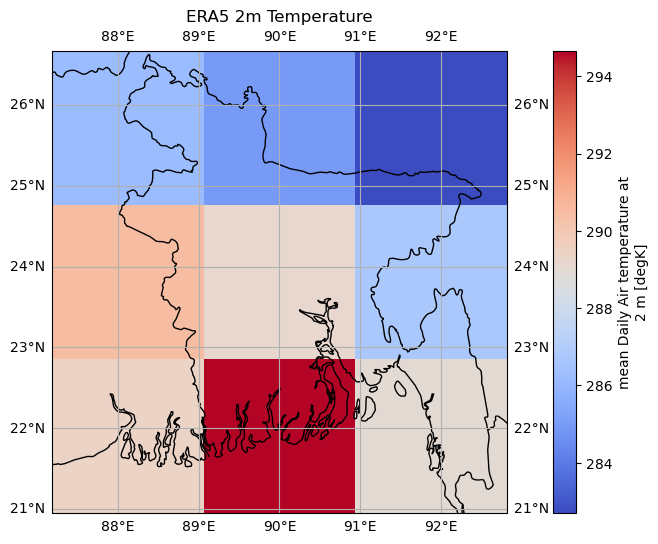

In [28]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Define the projection (PlateCarree for lat/lon data)
projection = ccrs.PlateCarree()

# Create a figure and axis with Cartopy projection
fig, ax = plt.subplots(subplot_kw={'projection': projection},figsize=(12,6))

# Plot the temperature data
data_bangladesh_original['air'].plot.pcolormesh(ax=ax, transform=projection,cmap='coolwarm')

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.add_feature(cartopy.feature.BORDERS)
# ax.set_extent([80, 100, 15, 30])
# Customize plot properties
plt.title('ERA5 2m Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a colorbar

ax.set_label('Temperature (K)')

# Show the plot
plt.show()


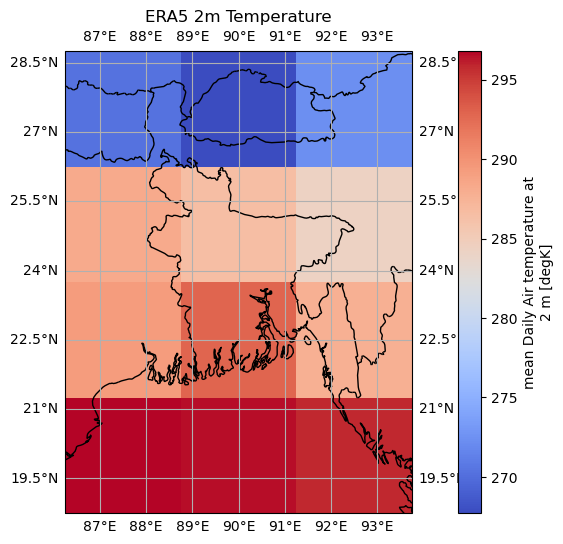

In [29]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Define the projection (PlateCarree for lat/lon data)
projection = ccrs.PlateCarree()

# Create a figure and axis with Cartopy projection
fig, ax = plt.subplots(subplot_kw={'projection': projection},figsize=(12,6))

# Plot the temperature data
data_bangladesh_resized['air'].plot.pcolormesh(ax=ax, transform=projection,cmap='coolwarm')

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.add_feature(cartopy.feature.BORDERS)
# ax.set_extent([80, 100, 15, 30])
# Customize plot properties
plt.title('ERA5 2m Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a colorbar

ax.set_label('Temperature (K)')

# Show the plot
plt.show()

# Extracting data

In [15]:
lat_range = slice(29,18.0)  # take lat values in backwards directions.
lon_range = slice(85, 97)  # 88.0 degrees east to 92.7 degrees east

# Use the sel method to select data within the specified Bangladesh region
data_bangladesh_resized = new_ds.sel(lat=lat_range,lon=lon_range)





In [16]:
import pandas as pd
import xarray as xr
from tqdm.auto import tqdm# Import tqdm
warnings.filterwarnings('ignore')

# # Open your netCDF dataset
# ds = xr.open_dataset('your_dataset.nc')

# Define the chunk size
chunk_size = 500  # Adjust this based on your available memory

# Initialize an empty DataFrame to store the results
t2m_df = pd.DataFrame(columns=['time', 'lat', 'lon', 't2m'])

# Calculate the number of chunks
num_chunks = len(data.time)

# Create a tqdm progress bar
for start in tqdm(range(0, num_chunks, chunk_size),desc='Main Loop'):
    end = start + chunk_size
    chunk = data_bangladesh_resized.isel(time=slice(start, end))

    # Extract the data
    time = chunk.time.values
    lat = chunk.lat.values
    lon = chunk.lon.values
    t2m = chunk.air.values

    # Create a DataFrame for this chunk and append it to the main DataFrame
    chunk_df = pd.DataFrame({
        'time': time.repeat(len(lat) * len(lon)),
        'lat': np.tile(lat, len(time) * len(lon)),
        'lon': np.tile(lon, len(time) * len(lat)),
        't2m': t2m.ravel()
    })

    t2m_df = t2m_df.append(chunk_df, ignore_index=True)

# t2m_df now contains the concatenated data
t2m_df

Main Loop:   0%|          | 0/31 [00:00<?, ?it/s]

,time,lat,lon,t2m
0,1981-01-01,27.5,85.0,279.429169
1,1981-01-01,25.0,87.5,274.312500
2,1981-01-01,22.5,90.0,273.324097
3,1981-01-01,20.0,92.5,275.792358
4,1981-01-01,27.5,95.0,278.986633
...,...,...,...,...
306795,2022-12-31,20.0,85.0,295.165497
306796,2022-12-31,27.5,87.5,296.732513
306797,2022-12-31,25.0,90.0,295.049927
306798,2022-12-31,22.5,92.5,293.973755


In [22]:
t2m_df[299500:299560]


0	2022-01-01	27.5	85.0	277.4419
1	2022-01-01	27.5	87.5	270.56342
2	2022-01-01	27.5	90.0	269.3927
3	2022-01-01	27.5	92.5	274.1138
4	2022-01-01	27.5	95.0	280.74176

,time,lat,lon,t2m
299500,2022-01-01,27.5,85.0,277.441895
299501,2022-01-01,25.0,87.5,270.563416
299502,2022-01-01,22.5,90.0,269.392700
299503,2022-01-01,20.0,92.5,274.113800
299504,2022-01-01,27.5,95.0,280.741760
299505,2022-01-01,25.0,85.0,289.063568
299506,2022-01-01,22.5,87.5,289.104553
299507,2022-01-01,20.0,90.0,288.089691
299508,2022-01-01,27.5,92.5,286.859833
299509,2022-01-01,25.0,95.0,288.762512


# Doing the same thing using for loop.

Its not same

In [17]:
warnings.filterwarnings('ignore')
from tqdm.auto import tqdm



df = pd.DataFrame(columns=["time", "lat", "lon", "t2m"])

# Loop through dimensions and populate the DataFrame
for time_val in tqdm(data_bangladesh_resized.coords["time"][14975:].values,desc='Main Loop',leave=True):
    for lat_val in tqdm(data_bangladesh_resized.coords["lat"].values,desc=f"loop for time_val={time_val}",leave=False):
        for lon_val in tqdm(data_bangladesh_resized.coords["lon"].values,desc=f"loop for lon_val={lat_val}",leave=False):
            t2m = data_bangladesh_resized.sel(time=time_val, lat=lat_val, lon=lon_val).air.values
            df = df.append({"time": time_val, "lat": lat_val, "lon": lon_val, "t2m": t2m}, ignore_index=True)


Main Loop:   0%|          | 0/365 [00:00<?, ?it/s]

loop for time_val=2022-01-01T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-02T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-03T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-04T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-05T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-06T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-07T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-08T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-09T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-10T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-11T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-12T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-13T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-14T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-15T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-16T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-17T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-18T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-19T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-20T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-21T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-22T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-23T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-24T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-25T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-26T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-27T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-28T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-29T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-30T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-01-31T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-01T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-02T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-03T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-04T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-05T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-06T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-07T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-08T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-09T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-10T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-11T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-12T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-13T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-14T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-15T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-16T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-17T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-18T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-19T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-20T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-21T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-22T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-23T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-24T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-25T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-26T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-27T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-02-28T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-01T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-02T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-03T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-04T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-05T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-06T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-07T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-08T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-09T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-10T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-11T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-12T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-13T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-14T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-15T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-16T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-17T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-18T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-19T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-20T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-21T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-22T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-23T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-24T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-25T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-26T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-27T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-28T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-29T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-30T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-03-31T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-01T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-02T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-03T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-04T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-05T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-06T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-07T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-08T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-09T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-10T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-11T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-12T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-13T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-14T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-15T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-16T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-17T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-18T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-19T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-20T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-21T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-22T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-23T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-24T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-25T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-26T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-27T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-28T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-29T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-04-30T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-01T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-02T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-03T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-04T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-05T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-06T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-07T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-08T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-09T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-10T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-11T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-12T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-13T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-14T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-15T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-16T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-17T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-18T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-19T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-20T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-21T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-22T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-23T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-24T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-25T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-26T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-27T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-28T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-29T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-30T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-05-31T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-01T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-02T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-03T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-04T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-05T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-06T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-07T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-08T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-09T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-10T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-11T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-12T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-13T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-14T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-15T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-16T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-17T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-18T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-19T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-20T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-21T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-22T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-23T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-24T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-25T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-26T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-27T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-28T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-29T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-06-30T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-01T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-02T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-03T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-04T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-05T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-06T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-07T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-08T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-09T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-10T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-11T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-12T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-13T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-14T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-15T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-16T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-17T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-18T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-19T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-20T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-21T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-22T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-23T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-24T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-25T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-26T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-27T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-28T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-29T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-30T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-07-31T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-01T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-02T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-03T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-04T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-05T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-06T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-07T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-08T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-09T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-10T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-11T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-12T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-13T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-14T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-15T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-16T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-17T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-18T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-19T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-20T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-21T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-22T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-23T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-24T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-25T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-26T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-27T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-28T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-29T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-30T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-08-31T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-01T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-02T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-03T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-04T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-05T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-06T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-07T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-08T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-09T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-10T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-11T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-12T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-13T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-14T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-15T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-16T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-17T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-18T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-19T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-20T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-21T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-22T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-23T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-24T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-25T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-26T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-27T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-28T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-29T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-09-30T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-01T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-02T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-03T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-04T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-05T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-06T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-07T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-08T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-09T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-10T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-11T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-12T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-13T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-14T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-15T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-16T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-17T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-18T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-19T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-20T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-21T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-22T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-23T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-24T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-25T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-26T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-27T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-28T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-29T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-30T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-10-31T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-01T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-02T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-03T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-04T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-05T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-06T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-07T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-08T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-09T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-10T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-11T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-12T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-13T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-14T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-15T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-16T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-17T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-18T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-19T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-20T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-21T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-22T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-23T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-24T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-25T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-26T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-27T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-28T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-29T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-11-30T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-01T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-02T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-03T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-04T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-05T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-06T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-07T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-08T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-09T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-10T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-11T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-12T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-13T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-14T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-15T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-16T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-17T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-18T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-19T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-20T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-21T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-22T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-23T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-24T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-25T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-26T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-27T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-28T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-29T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-30T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for time_val=2022-12-31T00:00:00.000000000:   0%|          | 0/4 [00:00<?, ?it/s]

loop for lon_val=27.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/5 [00:00<?, ?it/s]

loop for lon_val=20.0:   0%|          | 0/5 [00:00<?, ?it/s]

In [24]:
df.head(60) # time taken for only year 2022         


25.0	95.0	288.762512

,time,lat,lon,t2m
0,2022-01-01,27.5,85.0,277.4419
1,2022-01-01,27.5,87.5,270.56342
2,2022-01-01,27.5,90.0,269.3927
3,2022-01-01,27.5,92.5,274.1138
4,2022-01-01,27.5,95.0,280.74176
5,2022-01-01,25.0,85.0,289.06357
6,2022-01-01,25.0,87.5,289.10455
7,2022-01-01,25.0,90.0,288.0897
8,2022-01-01,25.0,92.5,286.85983
9,2022-01-01,25.0,95.0,288.7625


In [64]:
path='/mnt/1A42C1DD42C1BE2F/MyProjects/ML_HEATWAVE/Air temperature/air.2m.gauss.2022.nc'
# path='/mnt/1A42C1DD42C1BE2F/MyProjects/ML_HEATWAVE/Air temperature/*.nc'


In [65]:
ds = xr.open_dataset(path)
# df = ds.to_dataframe()

# # df.to_csv(csv_file_out)
ds.air.shape

(365, 94, 192)

In [66]:
new_lat = np.arange(90, -91, -02.5).astype(np.float32)
new_lon = np.arange(0, 360, 02.5).astype(np.float32)

# Resample to the new grid size
new_ds = ds.interp(lat=new_lat, lon=new_lon)
# new_ds.air
# new_ds=new_ds.air.to_dataframe()
# new_ds

In [72]:
lat_range = slice(26.7,20.7) 
lon_range = slice(88,92.7)




# Use the sel method to select data within the specified Bangladesh region
data_bangladesh_resized = new_ds.sel(lat=lat_range,lon=lon_range)



In [73]:
# data_bangladesh_resized.air

In [74]:
df1 = data_bangladesh_resized.air.to_dataframe()
df1

air
time       lat  lon             
2022-01-01 25.0 90.0  288.089691
                92.5  286.859833
           22.5 90.0  293.468140
                92.5  289.475311
2022-01-02 25.0 90.0  288.433350
...                          ...
2022-12-30 22.5 92.5  285.860657
2022-12-31 25.0 90.0  285.811737
                92.5  285.012299
           22.5 90.0  292.700378
                92.5  285.889008

[1460 rows x 1 columns]

In [77]:
df1.reset_index(inplace=True,drop=False)



TypeError: DataFrame.reset_index() got an unexpected keyword argument 'level1'

In [71]:
df1

,time,lat,lon,air
0,2022-01-01,25.0,90.0,288.089691
1,2022-01-01,25.0,92.5,286.859833
2,2022-01-01,22.5,90.0,293.468140
3,2022-01-01,22.5,92.5,289.475311
4,2022-01-02,25.0,90.0,288.433350
...,...,...,...,...
1455,2022-12-30,22.5,92.5,285.860657
1456,2022-12-31,25.0,90.0,285.811737
1457,2022-12-31,25.0,92.5,285.012299
1458,2022-12-31,22.5,90.0,292.700378


In [43]:
# df['air'].isna().sum()

In [50]:
warnings.filterwarnings('ignore')
from tqdm.auto import tqdm



df = pd.DataFrame(columns=["time", "lat", "lon", "t2m"])

# Loop through dimensions and populate the DataFrame
for time_val in tqdm(data_bangladesh_resized.coords["time"].values,desc='Main Loop',leave=True):
    for lat_val in tqdm(data_bangladesh_resized.coords["lat"].values,desc=f"loop for time_val={time_val}",leave=False):
        for lon_val in tqdm(data_bangladesh_resized.coords["lon"].values,desc=f"loop for lon_val={lat_val}",leave=False):
            t2m = data_bangladesh_resized.sel(time=time_val, lat=lat_val, lon=lon_val).air.values
            df = df.append({"time": time_val, "lat": lat_val, "lon": lon_val, "t2m": t2m}, ignore_index=True)


Main Loop:   0%|          | 0/365 [00:00<?, ?it/s]

loop for time_val=2022-01-01T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-02T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-03T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-04T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-05T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-06T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-07T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-08T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-09T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-10T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-11T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-12T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-13T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-14T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-15T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-16T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-17T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-18T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-19T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-20T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-21T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-22T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-23T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-24T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-25T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-26T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-27T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-28T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-29T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-30T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-01-31T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-01T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-02T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-03T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-04T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-05T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-06T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-07T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-08T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-09T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-10T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-11T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-12T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-13T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-14T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-15T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-16T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-17T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-18T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-19T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-20T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-21T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-22T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-23T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-24T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-25T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-26T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-27T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-02-28T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-01T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-02T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-03T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-04T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-05T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-06T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-07T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-08T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-09T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-10T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-11T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-12T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-13T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-14T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-15T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-16T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-17T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-18T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-19T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-20T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-21T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-22T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-23T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-24T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-25T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-26T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-27T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-28T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-29T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-30T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-03-31T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-01T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-02T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-03T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-04T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-05T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-06T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-07T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-08T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-09T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-10T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-11T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-12T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-13T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-14T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-15T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-16T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-17T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-18T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-19T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-20T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-21T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-22T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-23T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-24T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-25T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-26T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-27T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-28T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-29T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-04-30T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-01T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-02T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-03T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-04T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-05T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-06T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-07T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-08T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-09T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-10T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-11T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-12T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-13T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-14T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-15T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-16T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-17T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-18T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-19T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-20T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-21T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-22T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-23T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-24T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-25T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-26T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-27T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-28T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-29T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-30T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-05-31T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-01T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-02T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-03T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-04T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-05T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-06T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-07T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-08T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-09T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-10T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-11T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-12T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-13T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-14T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-15T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-16T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-17T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-18T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-19T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-20T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-21T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-22T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-23T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-24T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-25T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-26T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-27T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-28T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-29T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-06-30T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-01T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-02T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-03T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-04T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-05T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-06T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-07T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-08T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-09T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-10T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-11T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-12T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-13T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-14T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-15T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-16T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-17T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-18T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-19T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-20T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-21T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-22T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-23T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-24T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-25T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-26T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-27T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-28T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-29T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-30T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-07-31T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-01T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-02T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-03T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-04T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-05T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-06T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-07T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-08T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-09T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-10T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-11T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-12T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-13T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-14T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-15T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-16T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-17T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-18T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-19T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-20T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-21T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-22T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-23T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-24T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-25T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-26T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-27T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-28T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-29T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-30T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-08-31T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-01T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-02T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-03T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-04T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-05T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-06T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-07T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-08T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-09T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-10T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-11T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-12T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-13T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-14T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-15T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-16T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-17T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-18T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-19T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-20T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-21T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-22T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-23T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-24T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-25T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-26T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-27T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-28T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-29T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-09-30T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-10-01T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-10-02T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-10-03T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-10-04T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-10-05T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-10-06T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-10-07T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-10-08T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-10-09T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-10-10T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-10-11T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-10-12T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-10-13T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-10-14T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-10-15T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-10-16T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-10-17T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-10-18T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-10-19T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-10-24T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-10-25T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-10-26T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-10-27T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-10-28T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-10-29T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-11-02T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-11-03T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-11-04T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-11-05T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-11-06T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-11-07T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-11-10T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-11-11T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-11-12T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-11-13T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-11-14T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-11-15T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-11-19T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-11-20T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-11-21T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-11-22T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-11-23T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-11-24T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-11-27T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-11-28T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-11-29T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-11-30T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-12-01T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-12-02T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-12-06T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-12-07T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-12-08T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-12-09T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-12-10T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-12-11T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-12-15T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-12-16T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-12-17T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-12-18T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-12-19T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-12-23T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-12-24T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-12-25T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-12-26T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-12-27T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-12-28T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for time_val=2022-12-31T00:00:00.000000000:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=25.0:   0%|          | 0/2 [00:00<?, ?it/s]

loop for lon_val=22.5:   0%|          | 0/2 [00:00<?, ?it/s]

,time,lat,lon,t2m
0,2022-01-01,25.0,90.0,288.0897
1,2022-01-01,25.0,92.5,286.85983
2,2022-01-01,22.5,90.0,293.46814
3,2022-01-01,22.5,92.5,289.4753
4,2022-01-02,25.0,90.0,288.43335
5,2022-01-02,25.0,92.5,286.8558
6,2022-01-02,22.5,90.0,293.84787
7,2022-01-02,22.5,92.5,289.92874
8,2022-01-03,25.0,90.0,286.53983
9,2022-01-03,25.0,92.5,284.2921


In [38]:
# path='/mnt/1A42C1DD42C1BE2F/MyProjects/ML_HEATWAVE/Air temperature/*.nc'

# data=xr.open_mfdataset(path)

In [ ]:
# df = data.to_dataframe()


In [ ]:
# 15.075  39.674999  2000-01-01 12:00:00    300.209993

https://gist.github.com/copernicusmarinegist/b57417225d0d4ea47c5d6200f9d8cac3

https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/use-netcdf-in-python-xarray/

http://schubert.atmos.colostate.edu/~cslocum/netcdf_example.html